In [2]:
import numpy as np
import matplotlib.pyplot as plt
import xlrd
%matplotlib inline

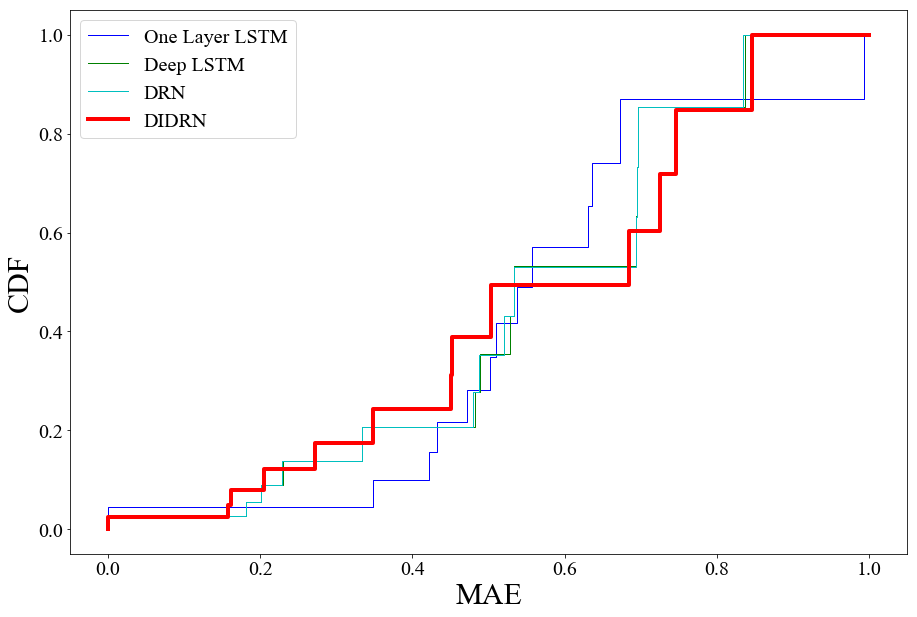

In [8]:
RMSE = list()
MAPE = list()
MAE = list()

flag_1 = 0
flag_2 = 1
flag_3 = 2
for i in range(4):
    data = xlrd.open_workbook('Performance.xlsx')
    table = data.sheets()[0]
    RMSE.append(table.col_values(flag_1))
    flag_1 += 3
    MAPE.append(table.col_values(flag_2))
    flag_2 += 3
    MAE.append(table.col_values(flag_3))
    flag_3 += 3

def normalize(data):
    d_min = min(data)
    d_max = max(data)
    for i in range(len(data)):
        data[i] = (data[i]-d_min)/(d_max-d_min)
    return data


figsize = (15,10)
figure_1,ax_1 = plt.subplots(figsize = figsize)
font1 = {'family' : 'Times New Roman',  
    'weight' : 'normal',  
    'size'   : 20,  
    }  

plt.tick_params(labelsize=20)  
labels = ax_1.get_xticklabels() + ax_1.get_yticklabels()  
[label.set_fontname('Times New Roman') for label in labels]  
#plt.yticks((np.arange(7)+1)*0.05,('5%','10%','15%','20%','25%','30%','35%'))
font2 = {'family' : 'Times New Roman',  
    'weight' : 'normal',  
    'size'   : 30,  
    }  

CDF = list()
handle = [0,0,0,0]
model = ['One Layer LSTM','Deep LSTM','DRN','DIDRN']
color = ['b','g','c']
for i in range(4):
    #d_max = max(max(MAE))
    #d_min = min(min(MAE))
    #X = (np.array(MAE[i])-d_min)/(d_max-d_min)
   # X.sort()
    X = np.array(MAE[i])
    Z = (X-X.min())/(X.max()-X.min())
    Z.sort()
    Y = np.divide(Z,sum(Z))
    CDF.append(np.cumsum(Y))
    if i !=3:
        handle[i], = plt.step(Z,CDF[i],color[i],label = model[i],lw = 1)
    else:
        handle[i], = plt.step(Z,CDF[i],'r',label = model[i],lw = 4)
    plt.xlabel('MAE',font2)
    plt.ylabel('CDF',font2)
plt.legend(handles = handle,prop = font1)
plt.savefig('MAE_2.png',dpi = 100)

In [7]:
Z

array([0.45056951, 0.45219352, 1.        , 0.84590569, 0.5031456 ,
       0.3476655 , 0.20512264, 0.68411789, 0.27131645, 0.16105559,
       0.72475304, 0.        , 0.74668693, 0.15723173])

In [27]:
RMSE = list()
MAPE = list()
MAE = list()

flag_1 = 0
flag_2 = 1
flag_3 = 2
for i in range(4):
    data = xlrd.open_workbook('Performance.xlsx')
    table = data.sheets()[0]
    RMSE.append(table.col_values(flag_1))
    flag_1 += 3
    MAPE.append(table.col_values(flag_2))
    flag_2 += 3
    MAE.append(table.col_values(flag_3))
    flag_3 += 3

max(np.array(MAPE[2])-np.array(MAPE[3]))

0.021762764731052986

In [19]:
help(plt.yticks)

Help on function yticks in module matplotlib.pyplot:

yticks(*args, **kwargs)
    Get or set the *y*-limits of the current tick locations and labels.
    
    ::
    
      # return locs, labels where locs is an array of tick locations and
      # labels is an array of tick labels.
      locs, labels = yticks()
    
      # set the locations of the yticks
      yticks( arange(6) )
    
      # set the locations and labels of the yticks
      yticks( arange(5), ('Tom', 'Dick', 'Harry', 'Sally', 'Sue') )
    
    The keyword args, if any, are :class:`~matplotlib.text.Text`
    properties. For example, to rotate long labels::
    
      yticks( arange(12), calendar.month_name[1:13], rotation=45 )

